In [1]:
%load_ext autoreload
%autoreload 2

In [58]:
import os
import warnings
import IPython.display
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from utils.sound_utils import load_sound_file

In [59]:
warnings.filterwarnings("ignore")
plt.style.use("Solarize_Light2")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [60]:
DATA_PATH = "../dataset/ravdess/Audio_Speech_Actors_01-24"
IMAGE_PATH = "./img"

# Exploratory Data Analysis

In [61]:
male_signal_file = os.path.join(
    DATA_PATH, "Actor_23", "03-01-03-01-01-01-23.wav"
)  # only one pair of sound clips selected
print(male_signal_file)
female_signal_file = os.path.join(
    DATA_PATH, "Actor_24", "03-01-03-01-01-01-24.wav"
)
male_signal, _ = load_sound_file(male_signal_file)
female_signal, sr = load_sound_file(female_signal_file)

print(
    f"The signals have a {male_signal.shape} shape. At {sr} Hz, these are {female_signal.shape[0] / sr:.0f}s signals."
)

/home/ubuntu/hy.cheng/code/nlp/0424/dataset/ravdess/Audio_Speech_Actors_01-24/Actor_23/03-01-03-01-01-01-23.wav
The signals have a (160160,) shape. At 48000 Hz, these are 4s signals.


In [62]:
IPython.display.Audio(male_signal, rate=sr)

In [63]:
IPython.display.Audio(female_signal, rate=sr)

### Wave Forms

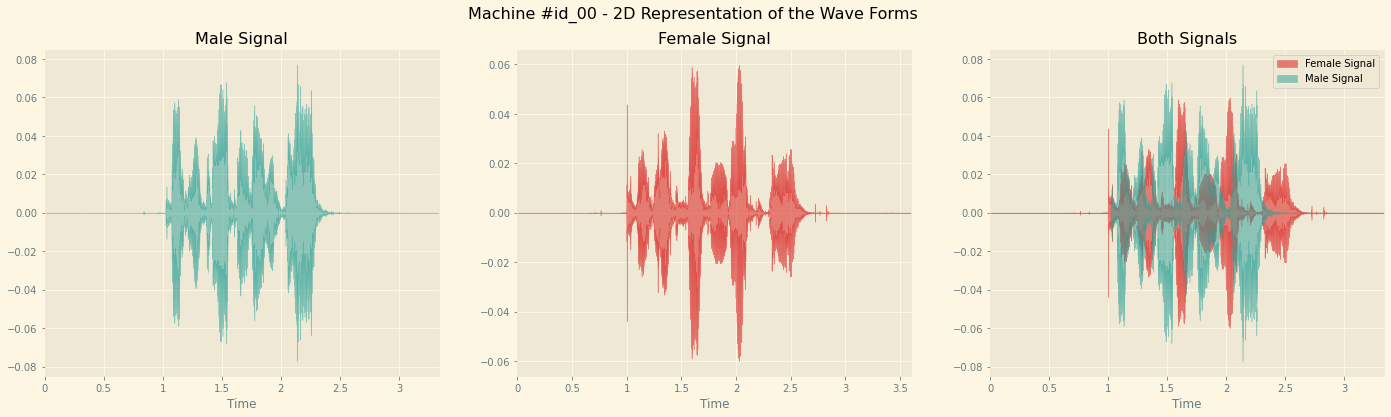

In [64]:
fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
librosa.display.waveplot(
    male_signal,
    sr=sr,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Machine #id_00 - Normal Signal",
)
plt.title("Male Signal")

plt.subplot(1, 3, 2)
librosa.display.waveplot(
    female_signal,
    sr=sr,
    alpha=0.6,
    color=colors[5],
    linewidth=0.5,
    label="Machine #id_00 - Abnormal Signal",
)
plt.title("Female Signal")

plt.subplot(1, 3, 3)
librosa.display.waveplot(
    female_signal,
    sr=sr,
    alpha=0.6,
    color=colors[5],
    linewidth=0.5,
    label="Female Signal",
)
librosa.display.waveplot(
    male_signal,
    sr=sr,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Male Signal",
)
plt.title("Both Signals")

fig.suptitle("Machine #id_00 - 2D Representation of the Wave Forms", fontsize=16)
plt.legend()
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "wave_forms.svg"), format="svg")

### Short Time Fourier Tranform

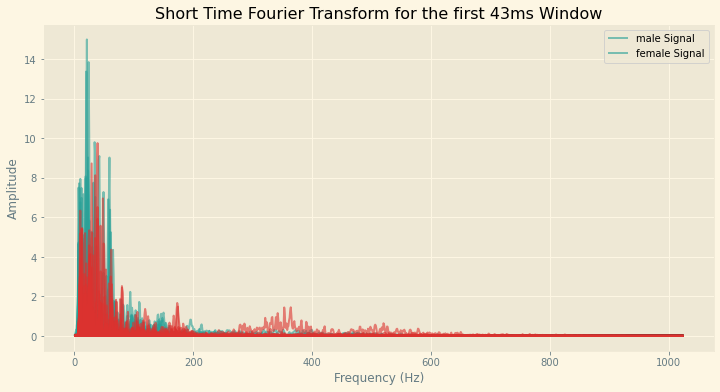

In [66]:
n_fft = 2048
male_stft = np.abs(
    librosa.stft(male_signal, n_fft=n_fft, hop_length=n_fft + 1)
)
female_stft = np.abs(
    librosa.stft(female_signal, n_fft=n_fft, hop_length=n_fft + 1)
)

fig = plt.figure(figsize=(12, 6))
plt.plot(
    male_stft, color=colors[1], alpha=0.6, label="male"
)

plt.plot(
    female_stft, color=colors[5], alpha=0.6, label="female"
)
plt.title(
    f"Short Time Fourier Transform for the first {n_fft / sr * 1000:.0f}ms Window"
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
#plt.legend(["male Signal", "female Signal"])
#plt.xlim(0, 1500)
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "stft.svg"), format="svg")

### Spectrograms (dB scale)

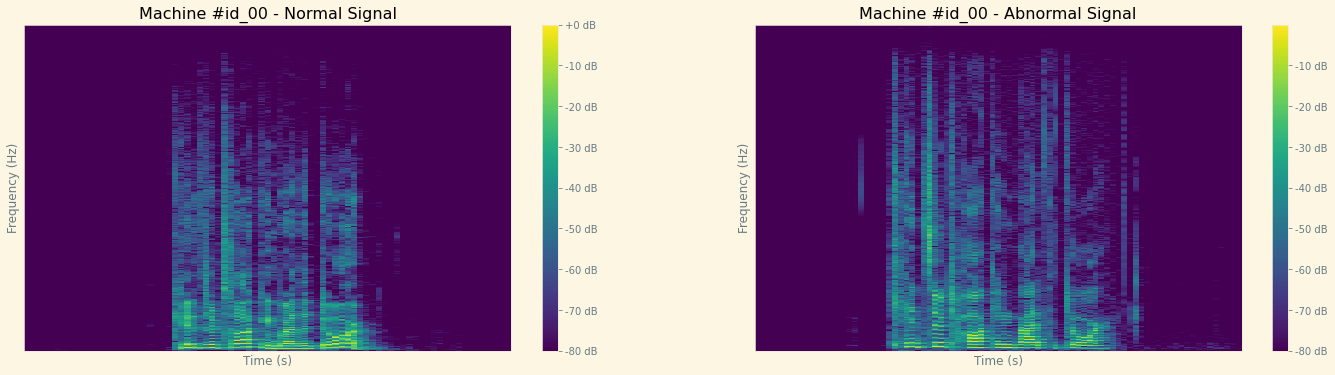

The spectrograms have a (1025, 79) shape.


In [74]:
n_fft = 2048
hop_length = 2048+1
male_stft = np.abs(librosa.stft(male_signal, n_fft=n_fft, hop_length=n_fft+1))
male_spectrogram = librosa.amplitude_to_db(male_stft, ref=np.max)
female_stft = np.abs(
    librosa.stft(female_signal, n_fft=n_fft, hop_length=n_fft+1)
)
female_spectrogram = librosa.amplitude_to_db(female_stft, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    male_spectrogram,x_axis=None, y_axis=None, cmap="viridis",sr=sr,hop_length=hop_length
)
plt.title("Machine #id_00 - Normal Signal")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    female_spectrogram, x_axis=None, y_axis=None, cmap="viridis",sr=sr,hop_length=hop_length
)
plt.title("Machine #id_00 - Abnormal Signal")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "spectrograms.svg"), format="svg")

print(f"The spectrograms have a {male_spectrogram.shape} shape.")

### Mel-Spectrograms

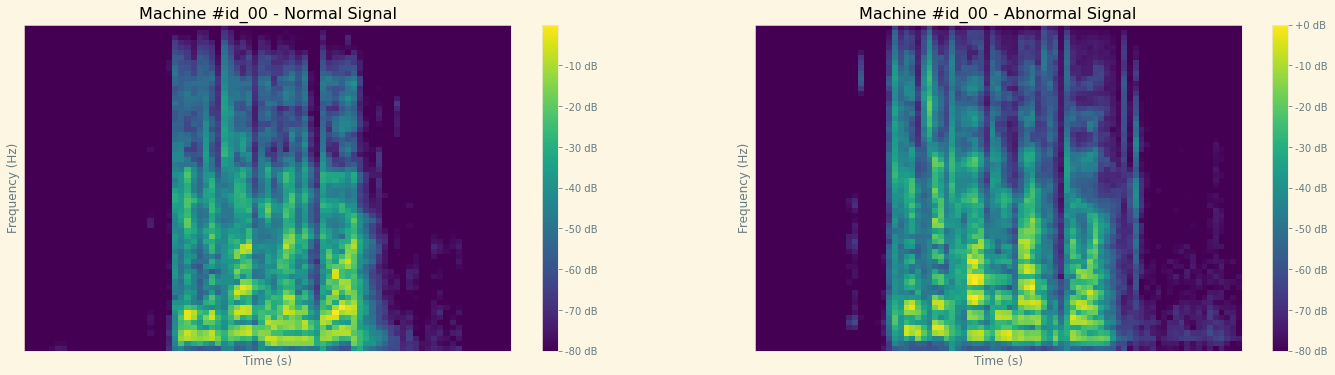

The mel-spectrograms have a (64, 79) shape.


In [76]:
n_mels = 64
male_mel_spectrogram = librosa.feature.melspectrogram(
    male_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
male_mel_spectrogram = librosa.power_to_db(male_mel_spectrogram, ref=np.max)
female_mel_spectrogram = librosa.feature.melspectrogram(
    female_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
female_mel_spectrogram = librosa.power_to_db(female_mel_spectrogram, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    male_mel_spectrogram,
    sr=sr,
    hop_length=hop_length,
    cmap="viridis",
)
plt.title("Machine #id_00 - Normal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    female_mel_spectrogram,
    sr=sr,
    hop_length=hop_length,
    cmap="viridis",
)
plt.title("Machine #id_00 - Abnormal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "mel_spectrograms.svg"), format="svg")

print(f"The mel-spectrograms have a {male_mel_spectrogram.shape} shape.")

### Multiple Frames of Spectrograms

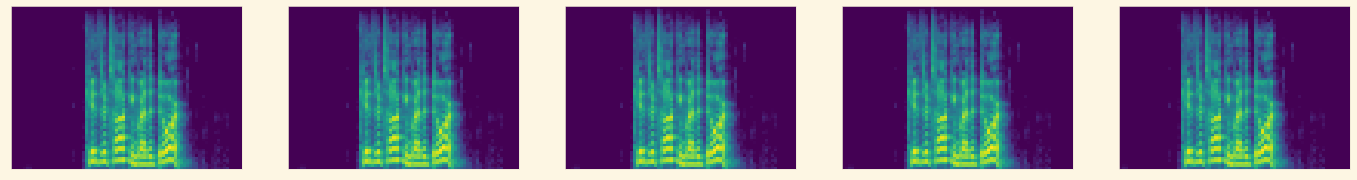

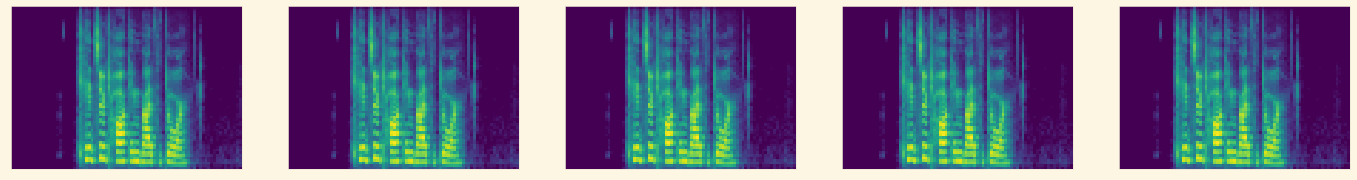

The features have a (81, 320) shape.


In [77]:
frames = 5
dims = frames * n_mels

features_vector_size = male_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = male_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr,
        hop_length=hop_length,
        cmap="viridis",
    )
fig.savefig(os.path.join(IMAGE_PATH, "normal_frames.svg"), format="svg")

features_vector_size = female_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = female_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr,
        hop_length=hop_length,
        cmap="viridis",
    )

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "abnormal_frames.svg"), format="svg")

print(f"The features have a {features.shape} shape.")